<a href="https://colab.research.google.com/github/RyanAlGhifari2211533014/Pembelajaran-Mesin-Ryan-Al-Ghifari-2211533014/blob/main/SVMNonLinearPraktikum2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [30]:
def plot_dataset (X,y, axes):
  plt.plot(X[:, 0][y==0], X[:,1][y==0], "bs")
  plt.plot(X[:, 0][y==1], X[:,1][y==1], "ms")
  if axes == [-1.5, 2.5, -1, 1.5]:
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$X_1$", fontsize=20)
    plt.ylabel(r"$X_2$", fontsize=20, rotation=0)
  plt.show

In [31]:
def plot_predictions (clf, axes):

    x0s = np.linspace (axes[0], axes[1], 100)
    x1s = np.linspace (axes [2], axes [3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision=clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [32]:
polynomial_svm_clf = Pipeline((

    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),  # Add four more spaces here
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
))

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scalar', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

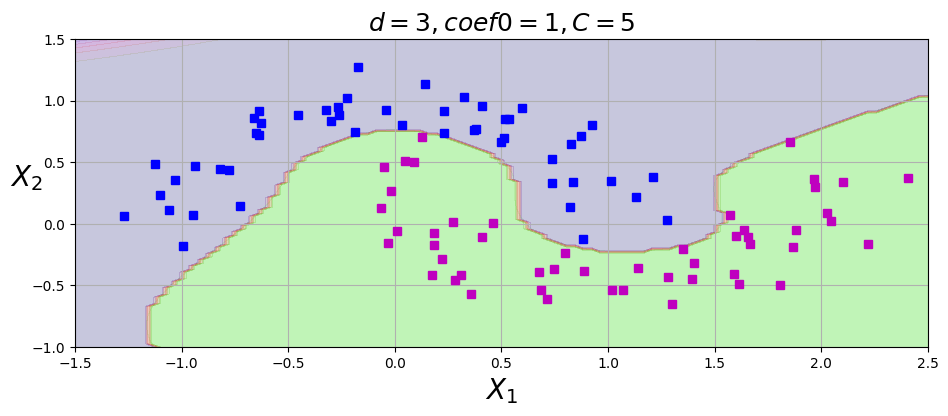

In [33]:
plt.figure(figsize=(11, 4))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.title(r"$d=3, coef0=1, C=5$", fontsize=18)
plt.show()